<a href="https://colab.research.google.com/github/KyungRyeolBaek/study/blob/main/AI%20study/ODE/ErrorCorr_f(xy)_21_07_25_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Error Corr

import

In [3]:
import autograd.numpy as np
from autograd import grad 
import autograd.numpy.random as npr
from autograd.core import primitive
from matplotlib import pyplot as plt
%matplotlib inline

using GPU

In [4]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.python.client import device_lib 
device_lib.list_local_devices() 
tf.test.is_gpu_available()
# gpu를 사용하려면 cmd와 jupyter notebook cell에서 모두 True값이 나와야 함

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [5]:
x_max = 1             # 최대 x 범위 : 0 <= x < x_max
w_number = 6          # w 개수
cost_limit = 0.1      # 최소 cost 
step_number = 30000   # step 횟수

def f(x, y):          # f(x, y)
  return 2*x*y

def anal(x):
  return np.exp(x)

def Error_Corr(x_max = 1, w_number = 6, cost_limt = 0.1, step_number = 30000):
  def sigmoid(x):
      return 1 / (1 + tf.math.exp(-x))

  def sigmoid_grad(x):
      return sigmoid(x) * (1 - sigmoid(x))

  def neural_network(W, x):
      a1 = sigmoid(tf.tensordot(x, W[0], axes = 1))
      return tf.tensordot(a1, W[1], axes = 1)

  def d_neural_network_dx(W, x, k=1):
      return tf.tensordot(tf.transpose(W[1]), tf.transpose(W[0])**k, axes = 1) * sigmoid_grad(x)

  x = tf.Variable(np.array([[i/100] for i in range(0, x_max * 100, 1)], dtype = np.float32))
  W = [tf.Variable(tf.random_normal([1, 10])), tf.Variable(tf.random_normal([10, 1]))]
  for i in range(1, w_number + 1):
      globals()['w{}'.format(i)] = tf.Variable(tf.random_normal([1]), name = 'weight{}'.format(i))
  y = 1
  yprime = 0

  sess = tf.Session()
  init = tf.global_variables_initializer()
  sess.run(init)

  for i in range(1, w_number + 1):
      y += globals()['w{}'.format(i)]*(x**i)  # y = 1 + w1*(x) + w2*(x**2) + w3*(x**3) + w4*(x**4) + w5*(x**5) + w6*(x**6)
      yprime += i*globals()['w{}'.format(i)]*(x**(i-1))  # yprime = w1 + 2*w2*x + 3*w3*(x**2) + 4*w4*(x**3) + 5*w5*(x**4) + 6*w6*(x**5)

  ye = (x**(w_number + 1)) * neural_network(W, x)
  yeprime = (w_number + 1) * (x**(w_number))*neural_network(W, x) + (x**(w_number + 1)) * d_neural_network_dx(W, x)

  cost = tf.reduce_mean(tf.square(yeprime - ye)) + tf.reduce_mean(tf.square(yprime - f(x, y)))
  optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
  train = optimizer.minimize(cost)

  count = 0
  cost_val = 1
  while cost_val > cost_limt:
    global x_space
    global y_space
    global ye_space
    global corr_space
    global cost_space

    x_space = []
    y_space = []
    ye_space = []
    corr_space = []
    cost_space = []

    if count % 1 == 0:
      print("count: ", count)
    for step in range(step_number + 1):
      for i in range(1, w_number + 1):
          globals()['w{}_val'.format(i)] = sess.run([globals()['w{}'.format(i)]])
      cost_val, yeprime_val, ye_val, yprime_val, y_val, x_val, _ = sess.run([cost, yeprime, ye, yprime, f(x, y), x, train])
      if count % 1 == 0:
        if step % int(step_number / 2) == 0:
            print('step: ', step, ", Cost: ", cost_val, "\n")
    if count % 1 == 0:
      print("\n")

    count += 1

    x_space += list(x_val)
    corr_space += list(ye_val + y_val)
    y_space += list(y_val)
    ye_space += list(ye_val)

    # final_sol = ye + f(x, y)
    # anal_sol = anal(x)
    # error = abs(final_sol - anal_sol)
    # print(np.linalg.norm)
    plt.plot(x_space, corr_space, '.', label = 'ye + f(x,y)')
    plt.plot(x_space, y_space, '.', label = 'f(x,y)')
    plt.plot(x_space, ye_space, '.', label = 'ye')
    plt.plot(x_space, anal(x_space), '.', label = 'exp')
    plt.legend()
    plt.show()

  sess.close()

count:  0
step:  0 , Cost:  3.583813 

step:  25000 , Cost:  0.39686358 

step:  50000 , Cost:  0.3060389 





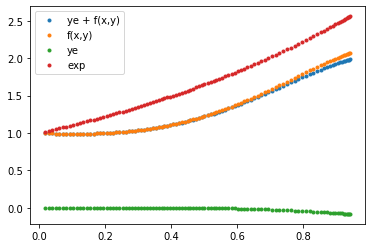

count:  1
step:  0 , Cost:  0.30603597 

step:  25000 , Cost:  0.24573103 

step:  50000 , Cost:  0.20209737 





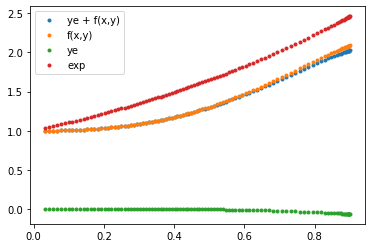

count:  2
step:  0 , Cost:  0.20209585 

step:  25000 , Cost:  0.16949043 

step:  50000 , Cost:  0.14446476 





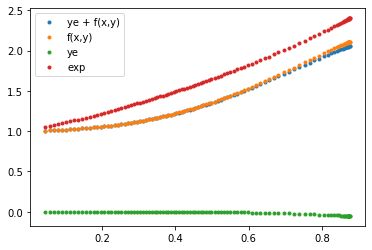

count:  3
step:  0 , Cost:  0.14446387 

step:  25000 , Cost:  0.12489922 

step:  50000 , Cost:  0.10922952 





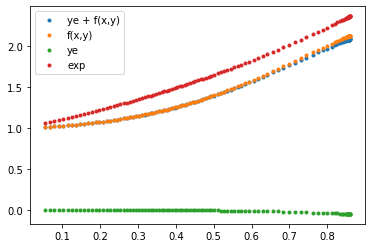

count:  4
step:  0 , Cost:  0.10922895 

step:  25000 , Cost:  0.096529715 

step:  50000 , Cost:  0.08613224 





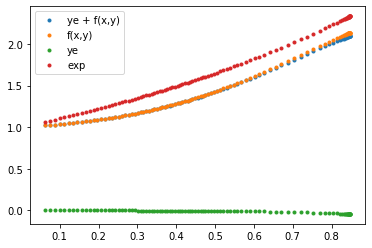

count:  5
step:  0 , Cost:  0.08613187 

step:  25000 , Cost:  0.0774897 

step:  50000 , Cost:  0.07022973 





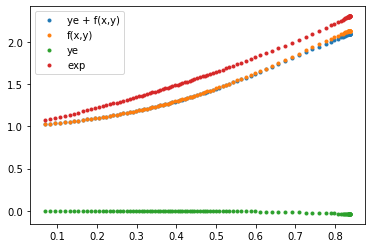

count:  6
step:  0 , Cost:  0.07022948 

step:  25000 , Cost:  0.063937716 

step:  50000 , Cost:  0.058540024 





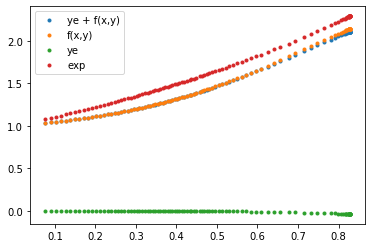

count:  7
step:  0 , Cost:  0.058539834 

step:  25000 , Cost:  0.05402581 

step:  50000 , Cost:  0.05003041 





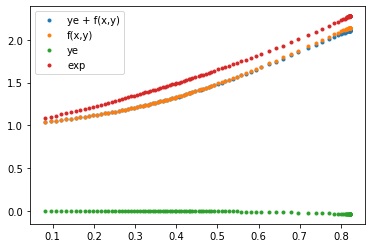

count:  8
step:  0 , Cost:  0.050030258 

step:  25000 , Cost:  0.046450883 

step:  50000 , Cost:  0.043212406 





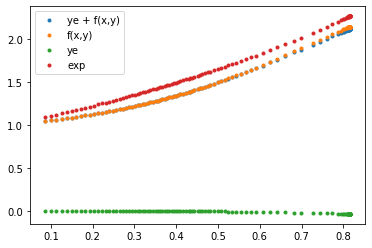

count:  9
step:  0 , Cost:  0.043212283 

step:  25000 , Cost:  0.040286466 

step:  50000 , Cost:  0.037648275 





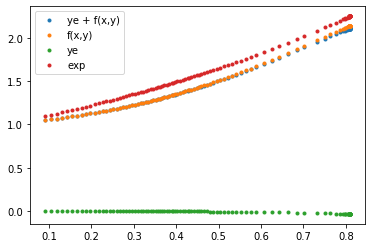

count:  10
step:  0 , Cost:  0.03764818 

step:  25000 , Cost:  0.03532423 

step:  50000 , Cost:  0.03339109 





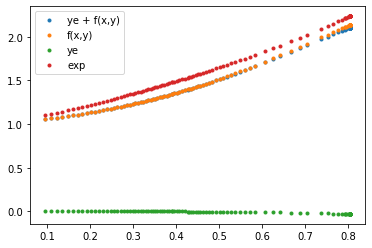

count:  11
step:  0 , Cost:  0.033391017 

step:  25000 , Cost:  0.031639945 

step:  50000 , Cost:  0.030015176 





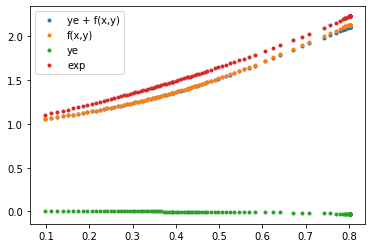

count:  12
step:  0 , Cost:  0.030015117 

step:  25000 , Cost:  0.028503034 

step:  50000 , Cost:  0.027068282 





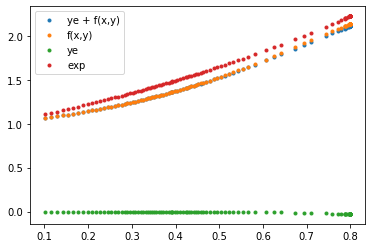

count:  13
step:  0 , Cost:  0.027068226 

step:  25000 , Cost:  0.025756175 

step:  50000 , Cost:  0.02453462 





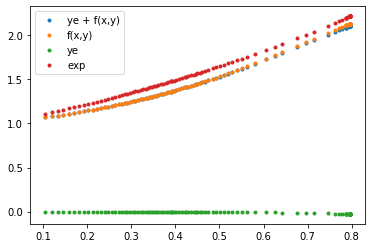

count:  14
step:  0 , Cost:  0.024534574 

step:  25000 , Cost:  0.02336744 

step:  50000 , Cost:  0.022266043 





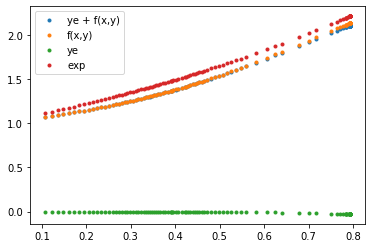

count:  15
step:  0 , Cost:  0.022266004 

step:  25000 , Cost:  0.021258345 

step:  50000 , Cost:  0.020297818 





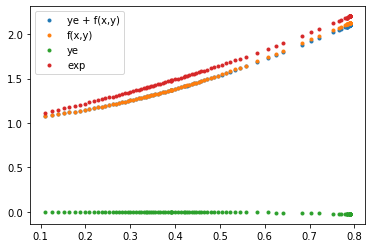

count:  16
step:  0 , Cost:  0.02029778 

step:  25000 , Cost:  0.019385168 

step:  50000 , Cost:  0.018521084 





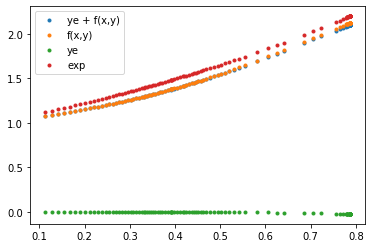

count:  17
step:  0 , Cost:  0.018521052 

step:  25000 , Cost:  0.017709348 

step:  50000 , Cost:  0.016972655 





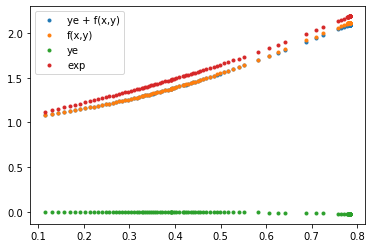

count:  18
step:  0 , Cost:  0.016972627 

step:  25000 , Cost:  0.016317496 

step:  50000 , Cost:  0.015689846 





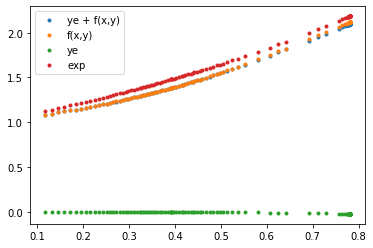

count:  19
step:  0 , Cost:  0.015689824 

step:  25000 , Cost:  0.0150616495 

step:  50000 , Cost:  0.014456205 





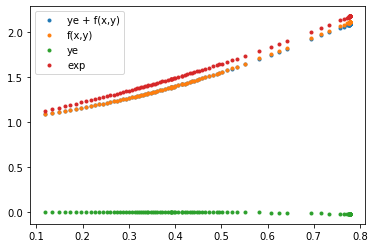

count:  20
step:  0 , Cost:  0.014456179 

step:  25000 , Cost:  0.013884985 

step:  50000 , Cost:  0.013338531 





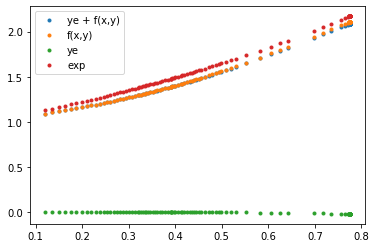

count:  21
step:  0 , Cost:  0.013338515 

step:  25000 , Cost:  0.012821741 

step:  50000 , Cost:  0.012389387 





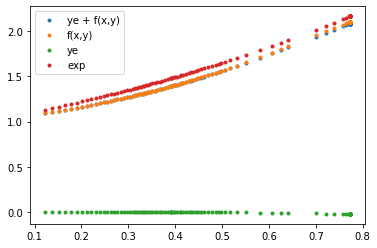

count:  22
step:  0 , Cost:  0.01238937 

step:  25000 , Cost:  0.012047283 

step:  50000 , Cost:  0.011726202 





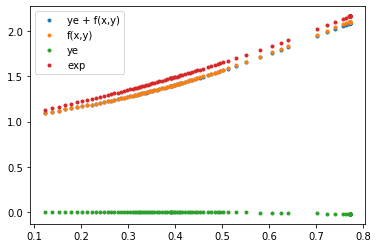

count:  23
step:  0 , Cost:  0.0117261885 

step:  25000 , Cost:  0.011427194 

step:  50000 , Cost:  0.011136065 





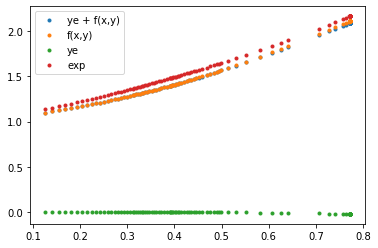

count:  24
step:  0 , Cost:  0.011136049 

step:  25000 , Cost:  0.010852502 

step:  50000 , Cost:  0.01057611 





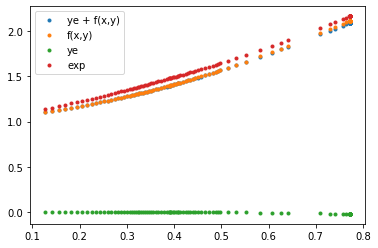

count:  25
step:  0 , Cost:  0.010576094 

step:  25000 , Cost:  0.010306813 

step:  50000 , Cost:  0.010043349 





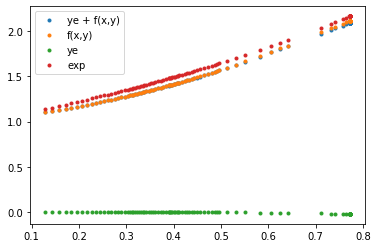

count:  26
step:  0 , Cost:  0.010043332 

step:  25000 , Cost:  0.0097854985 

step:  50000 , Cost:  0.009534314 





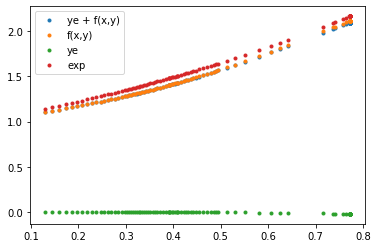

In [6]:
x_max = 1             # 최대 x 범위 : 0 <= x < x_max
w_number = 6          # w 개수
cost_limit = 0.01      # 최소 cost 
step_number = 50000    # step 횟수 -> 총 step 횟수 = count * step

def f(x, y):          # f(x, y)
  return y

def anal(x):
  return np.exp(x)

Error_Corr(x_max, w_number, cost_limit, step_number)

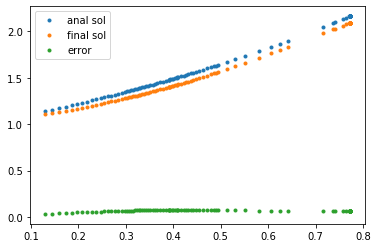

0.7003669


In [7]:
error = abs(corr_space - anal(x_space))
plt.plot(x_space, anal(x_space), '.', label = 'anal sol')
plt.plot(x_space, corr_space, '.', label = 'final sol')
plt.plot(x_space, error, '.', label = 'error')
plt.legend()
plt.show()
print(np.linalg.norm(error))